## Exercise 1

In [31]:
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import io
from skimage.util import img_as_float

def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()


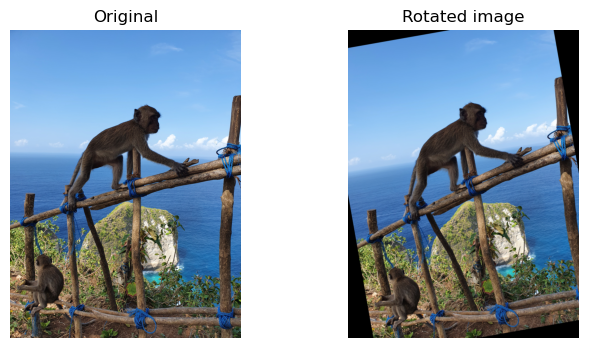

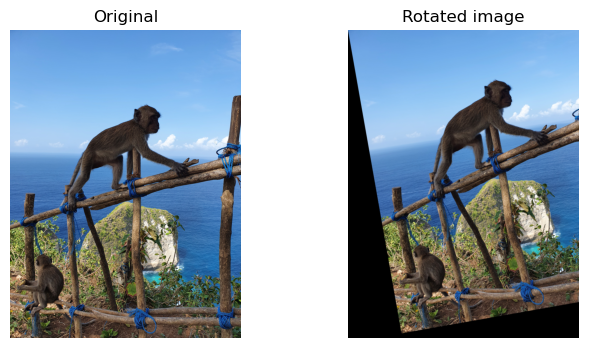

In [5]:

in_dir = "data/"

# X-ray image
im_name = "NusaPenida.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)
# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")
rot_center = [0, 0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
show_comparison(im_org, rotated_img, "Rotated image")
                     

## Exercise 2

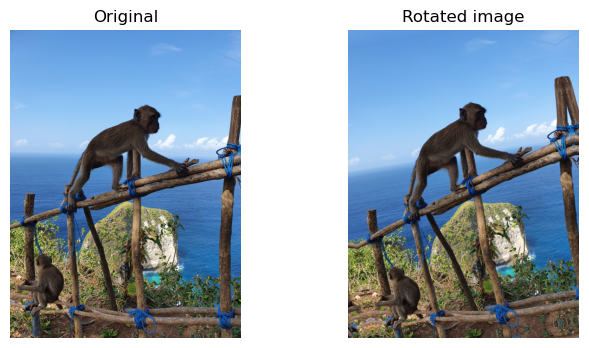

In [6]:
rotated_img = rotate(im_org, rotation_angle, mode="reflect")
show_comparison(im_org, rotated_img, "Rotated image")

## Exercise 3

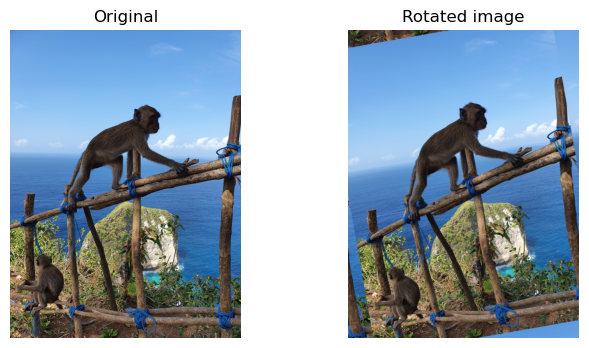

In [7]:
rotated_img = rotate(im_org, rotation_angle, mode="wrap")
show_comparison(im_org, rotated_img, "Rotated image")

## Exercise 4

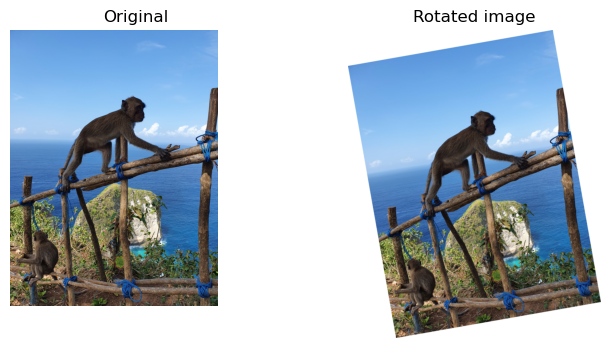

In [15]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=1)
show_comparison(im_org, rotated_img, "Rotated image")

## Exercise 5

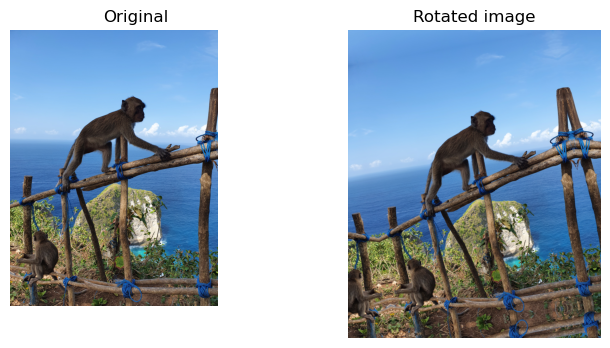

In [18]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="reflect")
show_comparison(im_org, rotated_img, "Rotated image")

## Exercise 6

In [19]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


## Exercise 7

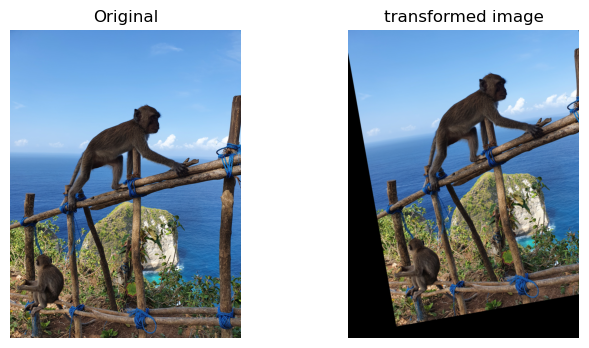

In [20]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "transformed image")

## Exercise 8

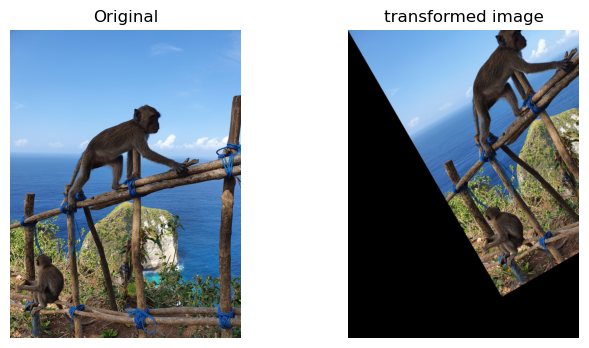

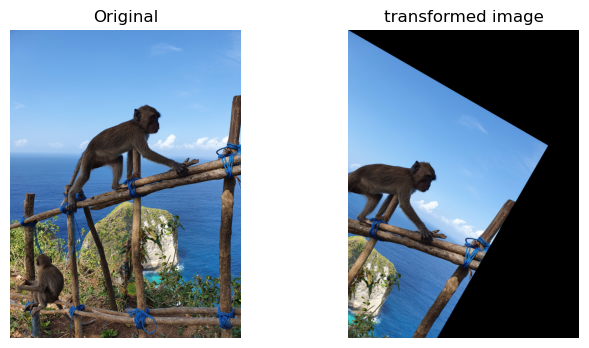

In [28]:
rotation_angle = 30.0 * math.pi / 180.
trans = [0, 0]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "transformed image")
transformed_img = warp(im_org, tform.inverse)
show_comparison(im_org, transformed_img, "transformed image")

## Exercise 9

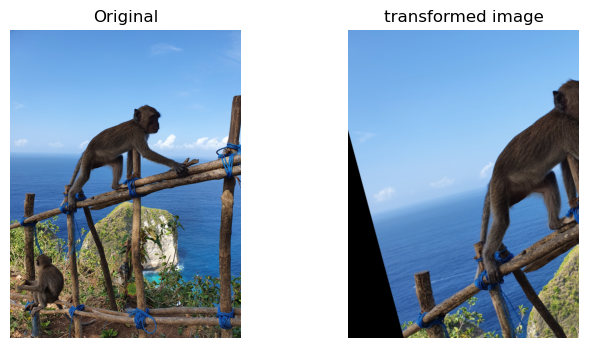

In [29]:
rotation_angle = 15.0 * math.pi / 180.
trans = [40, 30]
tform = SimilarityTransform(rotation=rotation_angle, translation=trans, scale=0.6)
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "transformed image")

## Exercise 10

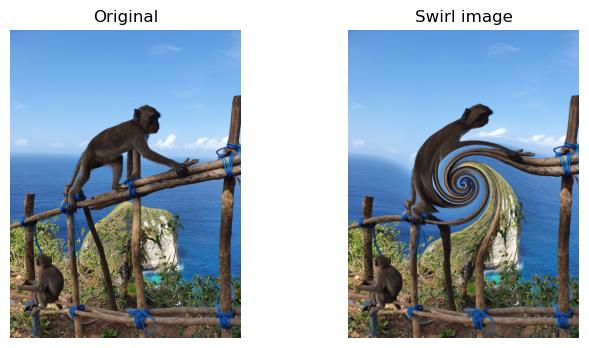

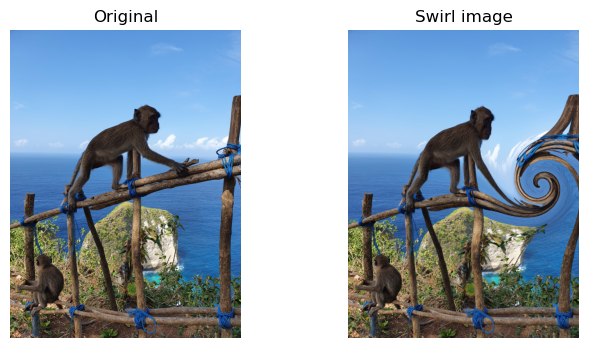

In [30]:
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)
show_comparison(im_org, swirl_img, "Swirl image")
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
show_comparison(im_org, swirl_img, "Swirl image")

## Exercise 11

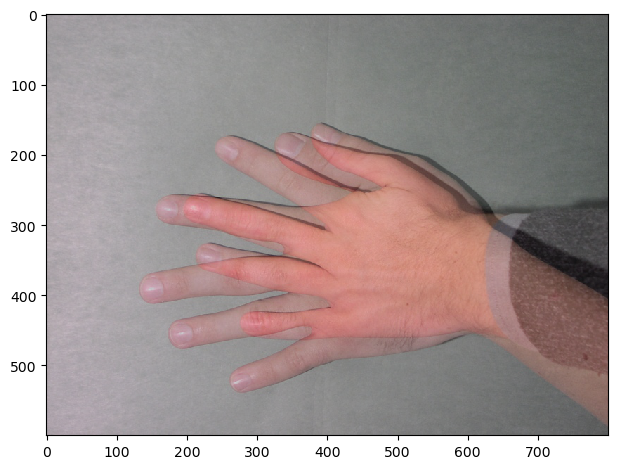

In [32]:
src_img = io.imread("data/Hand1.jpg")
dst_img = io.imread("data/Hand2.jpg")

blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

## Exercise 12

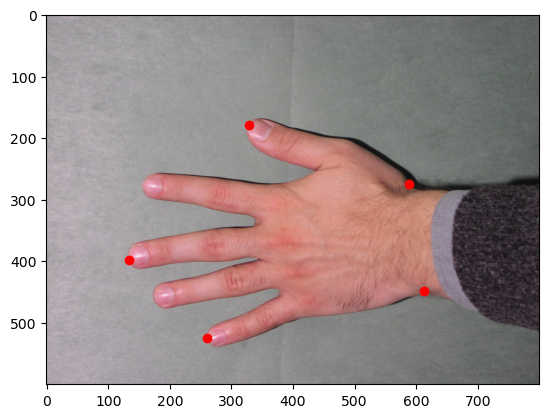

In [33]:
import numpy as np

src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

## Exercise 13

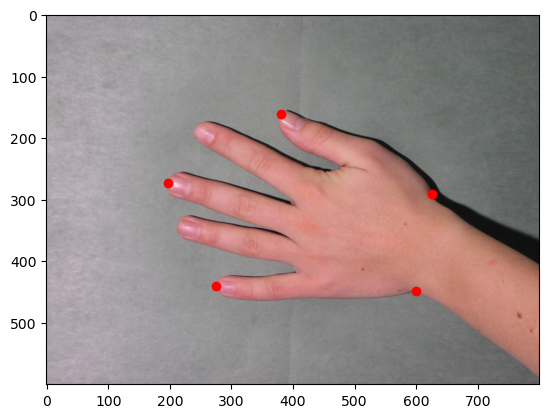

In [60]:
dst = np.array([[625, 290], [380, 160], [197, 272], [275, 440], [600, 448]])
plt.imshow(dst_img)
plt.plot(dst[:, 0], dst[:, 1], '.r', markersize=12)
plt.show()

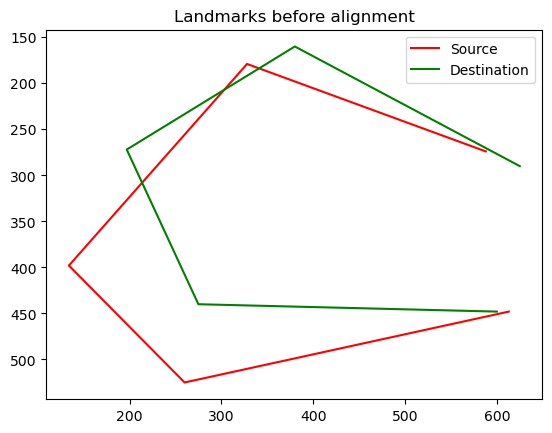

In [61]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

## Exercise 14

In [62]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 32154


In [63]:
tform = EuclideanTransform()
tform.estimate(src, dst)

True

In [65]:
from skimage.transform import matrix_transform

src_transform = matrix_transform(src, tform.params)

## Exercise 15

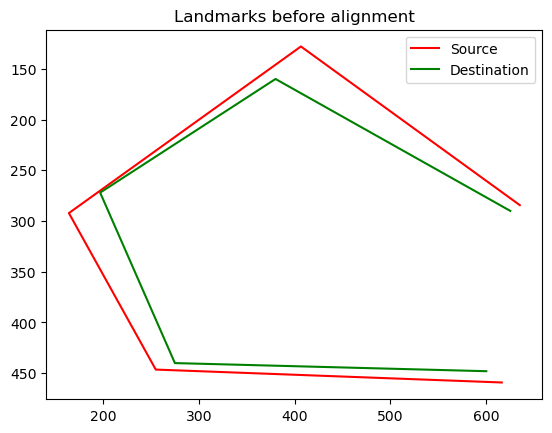

In [71]:


fig, ax = plt.subplots()
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

## Exercise 16

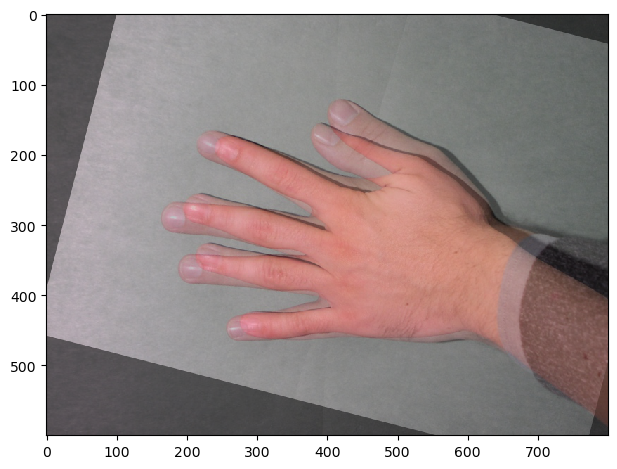

In [73]:
warped = warp(src_img, tform.inverse)

blend = 0.5 * img_as_float(warped) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()


## Exercise 16